In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# loading the dataset
data=pd.read_csv('data2.csv')
print data.head()

Y=data['h_score']
X=data[data.columns.difference(['h_score'])]

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    

   h_score       gdp
0    7.537  1.616463
1    7.522  1.482383
2    7.504  1.480633
3    7.494  1.564980
4    7.469  1.443572


Populating the interactive namespace from numpy and matplotlib
<< DONE TRAINING  >>


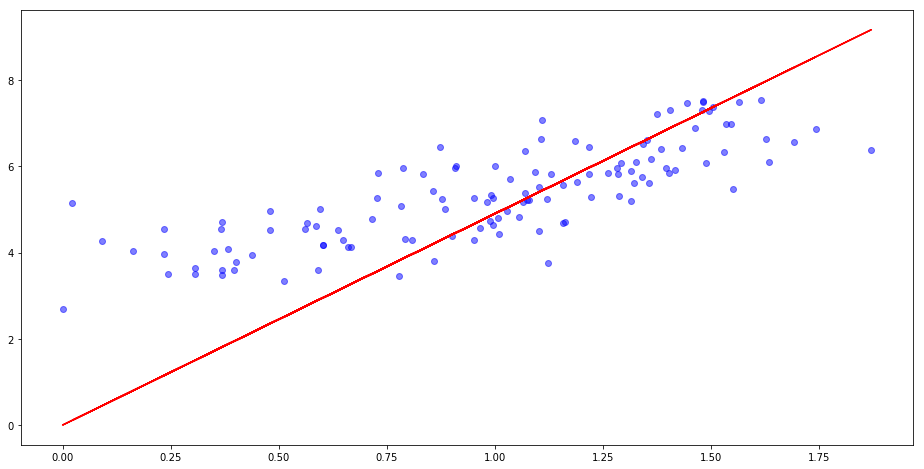

In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 8)

class linear_regression():
    def __init__(self):
        self.phi=None
        self.weights=None
        self.Y=None
        self.rmserr=100.0
    
    #fit the liniear regression model 
    def fit(self,X,Y,algo='ls'):
        self.phi=X.as_matrix()
        self.Y=Y.as_matrix()
        if algo=='ls':
            self.least_squared_fit()
    
    #lsfit
    def least_squared_fit(self):
        #phiT
        phi_t=self.phi.transpose()
        #(phiT*phi)
        temp_l=np.matmul(phi_t,self.phi)
        #inv(phiT*phi)
        phi_inv=np.linalg.inv(temp_l)
        #inv(phiT*phi)*phi
        temp_l_2=np.matmul(phi_inv,phi_t)
        #w=inv(phiT*phi)*phi*Y
        self.weights=np.matmul(temp_l_2,self.Y)
        #row vector to column vector weights
        self.weights=self.weights.reshape((self.weights.size,1))
        #calculate training rmse
        self.rmserr=self.rmse(self.phi,self.Y)
        print '<< DONE TRAINING  >>'

    #predict
    def predict(self,x):
        return np.matmul(x,self.weights);
    
    #calculate rmse for model
    def rmse(self,x,y):
        err=0.0
        for i in xrange(y.size):
            err+=(y[i]-self.predict(x[i]))**2
        err/=float(y.size)
        err=err**.5
        return err
    
    #print weights
    def print_weights(self):
        print self.weights

l=linear_regression()
l.fit(X_train,Y_train)
l.rmse(X_test.as_matrix(),Y_test.as_matrix())


plt.scatter(X_train,Y_train, alpha=0.5,color='blue')
plt.plot(X_train,l.predict(X_train.as_matrix()),'k',color='red')
plt.show()

